## WEEK-03-ASSIGNMENT 

## Working with CSV and PDFs

#### Submitted by Gururaj H C 

In [1]:
%pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import time
import PyPDF2
from datetime import datetime, timedelta
import re

### Reading, Writing CSV
Assignment: Read a CSV file named "people.csv" containing user details like Name, Age, Email and write this data to a new CSV file named "output.csv" but in reverse order of rows (i.e., last row of input becomes first row of output). 

In [3]:
df1 = pd.read_csv('people.csv')
print('Original Dataset')
print(df1.tail())
df1 = df1.iloc[::-1]
df1.to_csv('output.csv', index = False)
df_output = pd.read_csv('output.csv')
print('')
print('')
print('Modified dataset')
print(df_output.head())

Original Dataset
       Name  Age                Email          City         Phone
95    User3   44    user3@example.com  Philadelphia  567-890-1234
96  User144   42  user144@example.com       Phoenix  567-890-1234
97   User25   31                  NaN      New York           NaN
98   User24   53   user24@example.com   San Antonio  678-901-2345
99  User117   32  user117@example.com       Houston  456-789-0123


Modified dataset
      Name  Age                Email          City         Phone
0  User117   32  user117@example.com       Houston  456-789-0123
1   User24   53   user24@example.com   San Antonio  678-901-2345
2   User25   31                  NaN      New York           NaN
3  User144   42  user144@example.com       Phoenix  567-890-1234
4    User3   44    user3@example.com  Philadelphia  567-890-1234


### Handling headers, custom delimiters
Assignment: Given a CSV file "cars_data.txt" with a custom delimiter "|", read the file and write its contents to a new file "formatted.csv" with a comma as the delimiter. Ensure that the headers remain intact. 

In [4]:
df2 = pd.read_csv('cars_data.txt',delimiter='|')
print(df2.head())
df2.to_csv('formatted.csv',sep=',',header=True,index=False)
df_res = pd.read_csv('formatted.csv')
print(df_res.head())

        Brand   Model   Color Fuel_Type    Transmission  Year     Mileage  \
0      Nissan  ModelF  Silver    Diesel  Semi-Automatic  2020  111k miles   
1     Hyundai  ModelA    Gray    Diesel  Semi-Automatic  2010  111k miles   
2  Volkswagen  ModelF    Blue       Gas  Semi-Automatic  2019   89k miles   
3    Mercedes  ModelG     Red    Diesel       Automatic  2011   79k miles   
4       Honda  ModelI  Purple    Petrol  Semi-Automatic  2014   89k miles   

    Price   Owner Availability  
0  $82246   First    Available  
1  $98877  Second    Available  
2  $34016   Third    Available  
3  $98877   Third    Available  
4  $43379  Fourth    Available  
        Brand   Model   Color Fuel_Type    Transmission  Year     Mileage  \
0      Nissan  ModelF  Silver    Diesel  Semi-Automatic  2020  111k miles   
1     Hyundai  ModelA    Gray    Diesel  Semi-Automatic  2010  111k miles   
2  Volkswagen  ModelF    Blue       Gas  Semi-Automatic  2019   89k miles   
3    Mercedes  ModelG     Red  

### Reading PDFs: Extract info and text
Assignment: Extract text from a given PDF named "part_1.pdf" and save the extracted text to a text file named "extracted.txt".
 

In [5]:
with open("part_1.pdf", "rb") as input_file:
    pdf_reader = PyPDF2.PdfReader(input_file)
    extracted_text = ""
    
    for i in range(len(pdf_reader.pages)):
        page = pdf_reader.pages[i]
        extracted_text += page.extract_text()

with open("extracted.txt", "w", encoding="utf-8") as output_file:
    output_file.write(extracted_text)


### Writing and Combining PDFs
Assignment: Combine two given PDFs "part_1.pdf" and "part_2.pdf" into a single PDF named "combined.pdf"
________________________________________
 

In [6]:
with open("part_1.pdf", "rb") as pdf1_file, open("part_2.pdf", "rb") as pdf2_file:
    pdf1_reader = PyPDF2.PdfReader(pdf1_file)
    pdf2_reader = PyPDF2.PdfReader(pdf2_file)
    combined_pdf = PyPDF2.PdfWriter()
    for page in pdf1_reader.pages:
        combined_pdf.add_page(page)
    for page in pdf2_reader.pages:
        combined_pdf.add_page(page)
    with open("combined.pdf", "wb") as output_pdf:
        combined_pdf.write(output_pdf)

### Skill Set: Dates, Times, and Regular Expressions 

### Working with Dates and Times
Assignment: Given a date string "2023-04-15", write a program to add 45 days to it and return the new date.

In [7]:
date_string = '2023-04-15'
input_date = datetime.strptime(date_string, '%Y-%m-%d')
print(f'Initial date is {input_date}')
output_date = input_date + timedelta(days=45)
print('')
print('Adding 45 days to initial date')
print('')
print(f'Final date is {output_date}')

Initial date is 2023-04-15 00:00:00

Adding 45 days to initial date

Final date is 2023-05-30 00:00:00


### Assignment: Parse the date string "15th April, 2023" into a date object and then format it as "2023-04-15"
 

In [8]:
date = '15th April, 2023'
x = datetime.strptime(date, "%dth %B, %Y")
print(f'Input date format is : {date}')
print(f'Output date format is : {x.strftime("%Y-%m-%d")}')

Input date format is : 15th April, 2023
Output date format is : 2023-04-15


### Intro to regular expressions
Assignment: Write a regular expression to validate email addresses. Test it on a list of sample emails and filter out the invalid ones. Sample emails can be found in file ‘emails.txt’
 

In [9]:
pattern1 = r'^[a-zA-Z0-9._-]+@[a-zA-Z0-9.-_]+\.[a-zA-Z_-]{3,}$'        
pattern2 = r'^[a-zA-Z0-9._-]+@[a-zA-Z0-9.-_]+\.[a-zA-Z_-]{2,}\.[a-zA-Z_-]{2,}$'
pattern3 = r'^[a-zA-Z]'
pattern4 = r'\.\.'
pattern5 = r'\@\.'
pattern6 = r'.*\.$'
with open("emails.txt",'rb') as input_file:
    emails = input_file.readlines()
valid_emails = []
invalid_emails = []
for email in emails:
    email = email.strip()
    email = email.decode('utf-8')
    split_email = email.split('@')[0]
    flag = 0
    if not re.match(pattern3, email):
        flag=1
    if re.search(pattern4, email):
        flag=1
    if email.count('@')!=1:
        flag=1
    if re.search(pattern5, email):
        flag=1
    if email.count('.') == 0:
        flag=1
    if re.search(pattern6, split_email):
        flag=1
    if flag:
        invalid_emails.append(email)
    else:
        if (re.match(pattern1, email)) or (re.match(pattern2, email)):
            valid_emails.append(email)
        else:
            invalid_emails.append(email)
print('Displaying all the valid emails:')
print('')
for email in valid_emails:
    print(email)
print('')
print('-'*100)
print('')
print('Displaying all the invalid emails:')
print('')
for email in invalid_emails:
    print(email)

Displaying all the valid emails:

john.doe@example.com
alice_smith@example.co.uk
bob.jones@subdomain.example.org
frank@company123.com
name@subdomain.domain.io
UPPERCASE@DOMAIN.COM
mixedCase@DoMain.cOm

----------------------------------------------------------------------------------------------------

Displaying all the invalid emails:

eve@my-website.io
invalid-email
@missingusername.com
missingdomain@.com
double..dot@domain.com
.startdot@domain.com
enddot.@domain.com
missingatsign.com
extra@char@domain.com
name@domain
name@sub-domain.domain.com
name@domain.c
name@domain.cc
special_chars+1234@domain.com
unusual-char$_@domain.com


### Basic patterns: metacharacters, literals, quantifiers, groups
Assignment: Given a text, extract all the dates using regular expressions. Get the text from file ‘pattern.txt’
 

In [10]:
import re

# Define your date pattern (you can use the pattern you provided)
date_pattern = r'\b(\d{2}/\d{2}/\d{4}|\d{1,2}-\d{2}-\d{4}|\d{2,4}-\d{2}-\d{2}|\d{1,2}\s(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-zA-Z]*\s\d{4}|\d{2}/\d{2}/\d{2}|\d{1,2}\.\d{2}\.\d{4})\b'

# Open the file for reading
with open('patterns.txt', 'r') as file:
    # Read the file line by line or as a whole, depending on your needs
    text = file.read()

    # Use the regular expression pattern to find dates in the text
    date_matches = re.findall(date_pattern, text)

    # Process the matches
    for match in date_matches:
        print(match)


07/15/1988
09/24/2023
10/01/2023
02-14-2024
03.15.2024
05-08-2024
22/06/2024
07.30.2024
31-07-2025
08/15/2025
10.01.1960


In [16]:
pattern1 = r'\d{2}/\d{2}/\d{4}'
pattern2 = r'\d{1,2}(?:st|nd|rd|th)\s(?:January|February|March|April|May|June|July|August|September|October|November|December)'
pattern3 = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{1,2}(?:st|nd|rd|th),\s\d{4}'
pattern4 = r'\d{2}-\d{2}-\d{4}'
pattern5 = r'\d{1,2}-\d{1,2}-\d{4}'
pattern6 = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{1,2},\s\d{4}'
pattern7 = r'\d{2}-\d{2}-\d{4}'
pattern8 = r'\d{1,2}.\d{1,2}.\d{4}'
pattern9 = r'(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s\d{1,2},\s\d{4}'
pattern10 = r'\d{1,2}(?:st|nd|rd|th)\s(?:of)\s(?:January|February|March|April|May|June|July|August|September|October|November|December),\s\d{4}'
pattern = f'{pattern1}|{pattern2}|{pattern3}|{pattern4}|{pattern5}|{pattern6}|{pattern7}|{pattern8}|{pattern9}|{pattern10}'
dates = re.findall(pattern, text)
for date in dates:
    print(date)

07/15/1988
23rd September
09/24/2023
10/01/2023
January 2nd, 2024
02-14-2024
5-5-2020
March 15, 2024
03.15.2024
Apr 5, 2024
8th of May, 2024
05-08-2024
June 21, 2024
22/06/2024
07.30.2024
31-07-2025
08/15/2025
September 1, 2025
10.01.1960


## Web Scraping and Exception Handling
 

### Intro to scraping
Assignment: Write a basic script to scrape the title of a given webpage.
 

In [25]:
import requests
from bs4 import BeautifulSoup

url = input('Enter a url of your choice : ')
try:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        title = soup.title.string
        print('')
        print(f'Title of {url} is {title}')
    else:
        print('')
        print(f'Unknown response code : {response.status_code}')
except:
    print('')
    print('Error! No such webpage')

Enter a url of your choice : http://www.googlee.com

Unknown response code : 404


### Making HTTP Requests with requests
Assignment: Use the requests library to fetch the content of a webpage and print its status code.
 

In [28]:
import requests
from bs4 import BeautifulSoup

url = input('Enter a url of your choice : ')
try:
    response = requests.get(url)
    if response.status_code == 200:
        print('')
        print(f'Response code from the webpage {url} is {response.status_code}')
        print('')
        print('Content of the webpage is : ')
        print(response.text)
    else:
        print('')
        print(f'Something wrong with the webpage, response code is {response.status_code}')
except:
    print('')
    print('Invalid webpage')


Enter a url of your choice : http://www.googlee.com

Something wrong with the webpage, response code is 404


### Parsing HTML with BeautifulSoup4
Assignment: Parse the content of a webpage to extract all the hyperlinks (a tags) using BeautifulSoup4. 

In [37]:
import requests
from bs4 import BeautifulSoup

url = input('Enter an URL of your choice : ')
try:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        links = soup.find_all('a')
        for link in links:
            href = link.get('href')
            print(href)
    else:
        print(f'Invalid response code {response.status_code} for : {url}')
except:
    print(f'Invalid webpage : {url}')


Enter an URL of your choice : http://www.googlee.com
Invalid response code 404 for : http://www.googlee.com


### Effective web scraping
Assignment: Scrape product names and prices from a mock e-commerce webpage and save them as a CSV. 

In [41]:
import requests
from bs4 import BeautifulSoup

print('Enter the product name below to fetch its different varients and prices : ')
prod = input().split()
url_1 = 'https://www.flipkart.com/search?q='
url_2 = '+'.join(prod)
url = url_1+url_2
print(url)

try:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        products = soup.find_all(div, class_="_4rR01T".text)
        prices = soup.find_all(div, class_="_30jeq3 _1_WHN1".text)
        print(products)
        print(prices)
    else:
        print(f'Unknown response code {response.status_code} for URL : {url}')
except:
    print(f'Invalid URL : {url}')
        
        
        

Enter the product name below to fetch its different varients and prices : 
One plus nord ce3 5g
https://www.flipkart.com/search?q=One+plus+nord+ce3+5g
Invalid URL : https://www.flipkart.com/search?q=One+plus+nord+ce3+5g


In [55]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

print('Enter the product name below to fetch its different variants and prices: ')
prod = input().split()
search_query = '+'.join(prod)
url = f'https://www.flipkart.com/search?q={search_query}'

try:
    response = requests.get(url)
    time.sleep(2)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        names = [element.text for element in soup.find_all('div', class_='_4rR01T')]
        time.sleep(2)
        prices = [element.text for element in soup.find_all('div', class_='_30jeq3 _1_WHN1')]
        df = pd.DataFrame({'Product_name': names, 'Product_price': prices})
        df.to_csv('products.csv', index=False)
        print('Content successfully saved to .csv file')
    else:
        print(f'Unknown response code {response.status_code} for URL: {url}')
except Exception as e:
    print(f'An error occurred: {e}')


Enter the product name below to fetch its different variants and prices: 
Iphone 14
Content successfully saved to .csv file


### Basic exceptions: SyntaxError, NameError, ValueError
Assignment: Write a script that intentionally causes each of the mentioned exceptions and handle them with appropriate error messages.
 

In [79]:
def create_NameError():
    try:
        a = 10
        b : 2  # This line will raise a SyntaxError
        c = a + b
    except NameError:
        print('Assign a value to each variable before using them')

create_NameError()

Assign a value to each variable before using them


In [80]:
def create_TypeError():
    try:
        name = ['Emplay', 'Inc']
        x = 10
        name + x  # This line will raise a TypeError
    except TypeError:
        print('Perform operations on similar datatypes')
        
create_TypeError()

Perform operations on similar datatypes


In [82]:
def create_Value_Error():
    try:
        print(int('abc'))
    except:
        print('Check the value of the variable before printing')
create_Value_Error()

Check the value of the variable before printing


In [83]:
def create_Syntax_Error():
    try:
        x = [1.2.3.4] 
    except SyntaxError:
        print(f'Check the syntax of the statement')

create_Syntax_Error()

SyntaxError: invalid syntax (<ipython-input-83-ffed06b6cb22>, line 3)

### Handling exception using try, except, finally
Assignment: Write a function to divide two numbers. Handle the ZeroDivisionError using try, except, and finally blocks. In the finally block, print "Operation complete."
 


In [87]:
def divide(x,y):
    try:
        print(f'Value of x is : {x}')
        print(f'Value of y is : {y}')
        print(f'{x} divided by {y} is :{x/y}')
    except:
        print('You are trying to divide a number by zero which is invalid')
    finally:
        print('Operation complete!')
if __name__ == "__main__":
    print('Enter the values of x and y below, seperated by spaces : ')
    x, y = [int(x) for x in input().split()]
    divide(x,y)

Enter the values of x and y below, seperated by spaces : 
5 0
Value of x is : 5
Value of y is : 0
You are trying to divide a number by zero which is invalid
Operation complete!


### Raise exception with raise
Assignment: Write a function that checks the length of a username. If the username is less than 5 characters or more than 15 characters, raise a custom exception. 

In [91]:
class InvalidUsernameLength(Exception):
    pass

def check_length(name):
    try:
        if len(name) < 5 or len(name) > 15:
            raise InvalidUsernameLength
    except InvalidUsernameLength: 
        print('Invalid username length!')

if __name__ == '__main__':
    print('Enter the username below to check if it\'s valid or not (valid only if its length is between 5-15 characters)')
    name = input()
    check_length(name)


Enter the username below to check if it's valid or not (valid only if its length is between 5-15 characters)
GR
Invalid username length!


## Skill Set: Data Visualization with Matplotlib
 

### Intro to Matplotlib
Assignment: Install Matplotlib and create a basic plot showing a linear relationship between two lists of numbers.
 

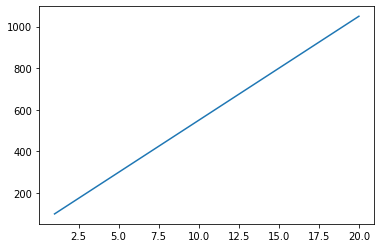

In [99]:
import matplotlib.pyplot as plt
x = list(range(1,21))
y = list(range(100,1100,50))
plt.plot(x,y)

### Basic Plots: Line Plots, scatter plots, bar plots
Assignment: Given a dataset of monthly sales data for a year, create a line plot for sales, a scatter plot for profit, and a bar plot for number of products sold.
 

Creating a line plot to show the variation of sales through out the year


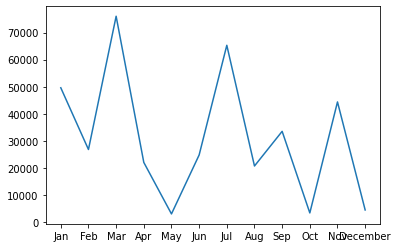


Creating a scatter plot to show the variation of profit through out the year


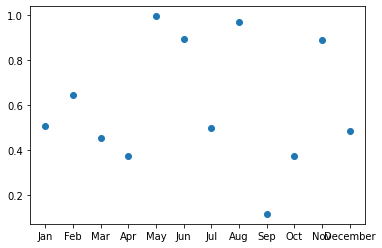


Creating a bar plot to show number of products sold throught out the year


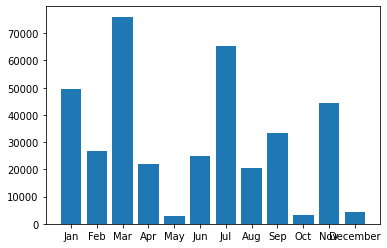

In [114]:
import random
df =  pd.DataFrame({
    'Month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','December'],
    'Sales':[random.randint(100,100000) for _ in range(12)],
    'Profit': [random.random() for _ in range(12)]
})
print('Creating a line plot to show the variation of sales through out the year')
plt.plot(df['Month'], df['Sales'])
plt.show()
print('')
print('Creating a scatter plot to show the variation of profit through out the year')
plt.scatter(df['Month'], df['Profit'])
plt.show()
print('')
print('Creating a bar plot to show number of products sold throught out the year')
plt.bar(df['Month'], df['Sales'])
plt.show()

### Advanced Plots: Histograms, box plots, pie charts
Assignment: Given a dataset of student marks, create a histogram showing the distribution of marks, a box plot to show the quartiles, and a pie chart to show the percentage of students in each grade category (A, B, C, D, F).


In [115]:
df = pd.DataFrame({
    'Name' : ['Atharva','Tanuja','Hrishita','Hruthvika','Samrudh','Harchith','Ishtarth','Samanvay','Bhooshira'],
    'Marks':[100,85,90,77,65,35,40,58,45],
    'Grade':['A','B','F','D','C','B','C','D','F']
})
df

,Name,Marks,Grade
0,Atharva,100,A
1,Tanuja,85,B
2,Hrishita,90,F
3,Hruthvika,77,D
4,Samrudh,65,C
5,Harchith,35,B
6,Ishtarth,40,C
7,Samanvay,58,D
8,Bhooshira,45,F


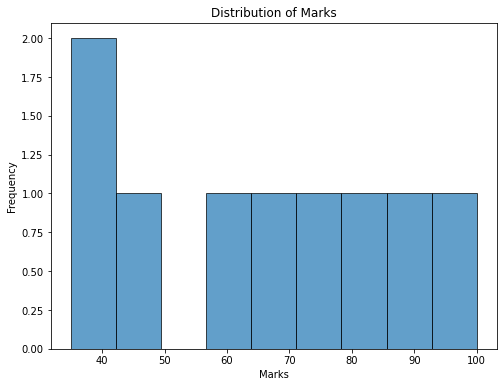

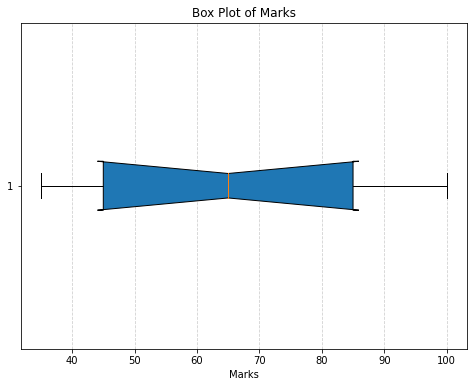

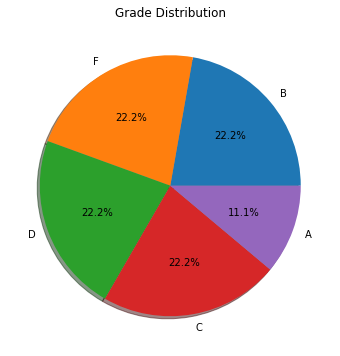

In [118]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Marks'], bins=9, edgecolor='black', alpha=0.7)
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.title('Distribution of Marks')
plt.show()

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Marks'], vert=False, notch=True, patch_artist=True)
plt.xlabel('Marks')
plt.title('Box Plot of Marks')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# Create a pie chart for grade distribution
grade_counts = df['Grade'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=0, shadow=True)
plt.title('Grade Distribution')
plt.show()


### Styling and Saving Plots
Assignment: Style the plots from the previous assignment using a theme of your choice and save each plot as a PNG image.
 

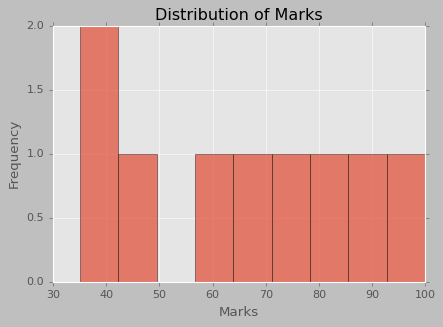

In [126]:
# Create a histogram
plt.figure(figsize=(6, 4))
plt.style.use('ggplot')
plt.hist(df['Marks'], bins=9, edgecolor='black', alpha=0.7)
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.title('Distribution of Marks')
plt.savefig('hist.png',dpi=300)
plt.show()

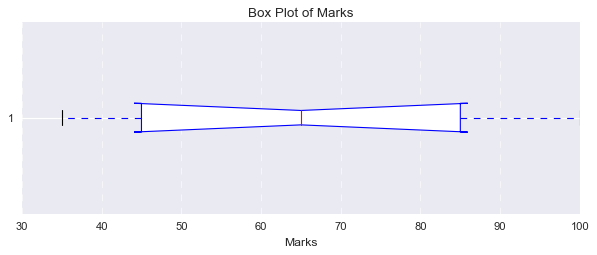

In [127]:
# Create a box plot
plt.figure(figsize=(9, 3))
plt.style.use('seaborn')
plt.boxplot(df['Marks'], vert=False, notch=True, patch_artist=True)
plt.xlabel('Marks')
plt.title('Box Plot of Marks')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.savefig('boxplot.png', dpi=300)
plt.show()

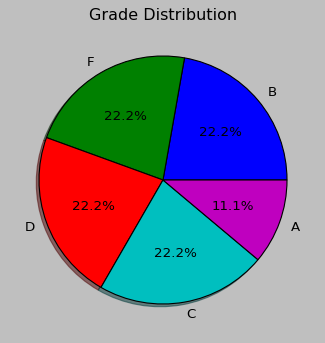

In [128]:
# Create a pie chart for grade distribution
grade_counts = df['Grade'].value_counts()
plt.style.use('classic')
plt.figure(figsize=(5, 5))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=0, shadow=True)
plt.title('Grade Distribution')
plt.savefig('piechart.png', dpi=300)
plt.show()